## Innoplexus

In [1]:
## import the libraries
import pandas as pd
import nltk
import re

In [2]:
data = pd.read_csv("train_F3WbcTw.csv", na_values = ("NA", " ", ""))
data_test = pd.read_csv("test_tOlRoBf.csv", na_values = ("NA", " ", ""))

In [3]:
print(data.shape)
print(data_test.shape)

(5279, 4)
(2924, 3)


In [4]:
data_test.head()

,unique_hash,text,drug
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara


In [5]:
unique_hash = data_test["unique_hash"]

In [6]:
## Cleaning the training data set
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download("stopwords")
corpus = []
for i in range(0, 5279):
    data["text"][0]   ## check the first text
    text = re.sub('[^a-zA-z]', " ", data["text"][i])
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words("english"))]
    text = " ".join(text)
    corpus.append(text)

[nltk_data] Downloading package stopwords to C:\Users\VIVAN
[nltk_data]     DSOUZA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
## print the training corpus
corpus

['autoimmun diseas tend come cluster gilenya feel good think chang anyth wast time energi take tysabri feel amaz symptom dodgi color vision sinc alway know know last month year decad ive decid enjoy ride point worri',
 'complet understand want tri result report lectur alway stand scrutini peer review public much still convinc hope work realli awar happi risk great think import present balanc way understand move straight first show promis anim studi use drug human still lot anim data gather human data gather anyon tell safe effect tell mani time anim studi follow human one major attrit point drug develop unpredict issu cladribin gilenya interact predict peopl tri doctor see pattern work go clemastin metformin excit given said current condit person risk toler make sens tri definit everyon',
 'interest target p receptor rather like fingolimod hope soon see ae sae ye sure mean exactli quot nine patient report seriou advers event mg [ ] mg [ ] mg [ ] mg [ ] seriou advers event report patien

In [8]:
len1 = 0
for i in corpus:
    len1 = len1 + len(i)
print(len1/5279)

1248.4868346277703


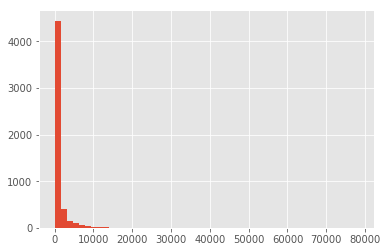

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use("ggplot")
plt.hist([len(s) for s in corpus], bins=50) 
plt.show()

In [10]:
## Clearning the testing data
corpus_test = []
for i in range(0, 2924):
    data_test["text"][0]
    text = re.sub('[^a-zA-z]', " ", data_test["text"][i])
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words("english"))]
    text = " ".join(text)
    corpus_test.append(text)

In [11]:
## print the test corpus
corpus_test

['previous stabl natalizumab switch fingolimod',
 'fingolimod sinc decemb way describ better like feel drunk without drink',
 'appar shingl red spot left breast appear day ago sure connect show gp immedi said shingl appar co left day late prescrib anyth shingl gp prescrib useless amitryptilin probabl take even low dose make unbear groggi still entir happi co stomach pain bad lot bloat stuff fever far know anyon experi shingl seem like expect week _ dx crohn june yay tri asa azathioprin mp remicad methotrex humira diet st surgeri subtot colectomi end ileostomi nd surgeri ileorect anastomosi stoma revers ileum connect rectum current statu chronic flare kind current med mg mp entyvio start',
 'docetaxel week x week week claim less harsh efficaci everi week diagnos stage nsclc egfr also posit year tarceva month rociletinib wbr follow month tarcrva puls carboplatin avastin alimta month tagrisso diagnos leptomening metastasi nov cm big tumor multipl nodul differ size recent guardant test feb

In [ ]:
## Creating the bag of words model - training model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 3]

In [ ]:
## BOW - test data
cv_test = CountVectorizer(max_features = 2000)
X_test = cv.fit_transform(corpus_test).toarray()

In [ ]:
## Splitting the dataset into train and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
## Fitting the Naive Bayes model to the training data set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
## Predicting the validation result
y_pred = classifier.predict(X_val)
y_pred

In [ ]:
## Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
cm

In [ ]:
Accuracy = ((24+127+141)/(19+96+17+9+130+17+82+548+138))*100
Accuracy

In [ ]:
## Predicting the test results
y_test = classifier.predict(X_test)
y_test

In [ ]:
result = y_test.tolist()
result

In [ ]:
unique_hash = unique_hash.tolist()

In [ ]:
type(unique_hash)
len(unique_hash)

In [ ]:
type(result)
len(result)

In [ ]:
df = pd.DataFrame({"unique_hash":unique_hash, "sentiment": result}, index = None)
len(df)

In [ ]:
df.to_csv("sixth_submission.csv", index = None)